In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS

#nlp
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
eng_stopwords = set(stopwords.words("english"))
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##Text Mining

Text mining, equivalent to text analytics, is the process of getting high-quality information from text. We can analyse comments, reviews, posts, articles and so on. For example text mining helps to check that comments or reviews are positive or negative.

This kernel will be updated and improved over time as I acquire new knowledge.

For now, this work is a collection of useful functions of text analysis using basic libraries and nltk, and a helpful source for feature engineering for other data sets.

If this kernel is useful to you, upvote and enjoy :)

##Simple variables from text

In [ ]:
sentence1 = "To be or not to be"

**Length of sentence**

In [ ]:
len(sentence1)

**Number of words in sentence**

In [ ]:
len(sentence1.split(' '))

**Leave only unique word in sentence**

Firstly we need to split sentence into list of words or signs.

In [ ]:
sentence1 = sentence1.split(' ')
print(sentence1)

sentence1 = set(sentence1)
sentence1

**Which words are shorter than two letters?**

In [ ]:
[s for s in sentence1 if len(s) > 2]

In [ ]:
sentence2 = "Be who #you are and say what you feel, #because those who mind don't matter, and those who matter don't #mind. @Madonna @"

In [ ]:
sentence2 = sentence2.split(' ')
sentence2

In [ ]:
sentence2 = set(sentence2)

**Which words start with 'm'?**

In [ ]:
[s for s in sentence2 if s.startswith('m')]

**Which words end with 'e'?**

In [ ]:
[s for s in sentence2 if s.endswith('e')]

**Any word from our list 'words'?**

In [ ]:
words = ['you', 'me', 'are', 'be']
[s for s in sentence2 if s in words]

In [ ]:
[s for s in sentence2 if s.isupper()]

**Finding hashtags**

In [ ]:
[s for s in sentence2 if s.startswith('#')]

##Regular Expressions

**Finding callout**

In [ ]:
[s for s in sentence2 if s.startswith('@')]

..but it doesn't work well every time.

We need to import Regular Expressions package and use better way to find callout.

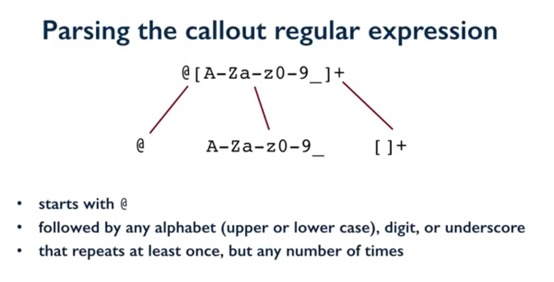

In [ ]:
import re
[s for s in sentence2 if re.search('@[A-Za-z0-9_]+',s)]

"[A-Za-z0-9_]" can be replace with meta-character "\w"

In [ ]:
[s for s in sentence2 if re.search('@\w+',s)]

**A few meta-characters**:

* . – wildcard, matches a single character
* ^ - start of a string
* $ - end of a string
* [] – match one of the set of characters within []
* [a-z] – letters from a to z
* [^abc] – matches a character that is not a, b or c
* a|b – matchers either a or b
* () - scoping for operators
* \ - special characters \n ect.
* \b – matches word boundary
* \d – any digit [0-9]
* \D – any non-dogit [^0-9]
* \s – any whitespace
* \S – any non-whitespace
* \w – alphanumeric character [A-Za-z0-9]


##Simple preprocessing

A few very popular techniques to make text more readable fo machines:
* *lower case*
* *removing white spaces*
* *removing stopwords* - a stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.
* *removing punctuation*
* *removing common words*
* *removing numbers*
* *tokenization* - split text to individual tokens (words)
* *stemming * - the process of converting a word to its base form
* *lemmatization* - the process of converting a word to its meaningful base form



##**Natural Language Processing**
(nltk package)

In nltk we have function for Stemming (**nltk.PorterStemmer**) and for Lemmatization (**nltk.WordNetLemmatizer**). 

To split sentences to individual words we can use Tokenization (**nltk.word_tokenize**).

Splitting text into individual sentences is possible by Sentence Tokenization (**nltk.sent_tokenize**)

##**NLP - Part of Speech Tagging (POS)**

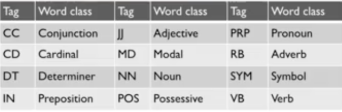

Let's see words included in MD (modal).

In [ ]:
import nltk
nltk.help.upenn_tagset('MD')

We can easily see part of speech of every word in sentence.

In [ ]:
nltk.pos_tag(sentence1)

##**Trying text mining on real data**

**Toxic Comment data set**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [ ]:
def read_and_concat_dataset(training_path, test_path):
    train = pd.read_csv(training_path)
    test = pd.read_csv(test_path)
    data = train.append(test, ignore_index=True)
    return train, test, data

train, test, data = read_and_concat_dataset('../input/jigsaw-toxic-comment-classification-challenge/train.csv', 
                                            '../input/jigsaw-toxic-comment-classification-challenge/test.csv')

Any missing values in independent variables?

In [ ]:
data.isnull().sum()

I want to add "normal" variable to identify comments which aren't toxic.

In [ ]:
data['normal'] = np.where((data.toxic==0) & (data.threat==0) & (data.severe_toxic==0) & 
                          (data.obscene==0) & (data.insult==0) & (data.identity_hate==0),1,0)
data['normal'] = np.where((data.toxic.isnull()),np.nan,data['normal'])

First of all, we need to unify the text, getting rid of capital letters and shortened forms. For this purpose the function "cleaning_comments" will be defined.

In [ ]:
def cleaning_comments(data, text):
    import re
    data[text] = data[text].apply(lambda x: " ".join(x.lower() for x in x.split()))
    data[text] = data[text].apply(lambda x: re.sub(r"what's", "what is ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"\'s", " ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"\'ve", " have ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"can't", "cannot ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"\'re", " are ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"n't", " not ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"i'm", "i am ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"\'d", " would ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"\'ll", " will ", x))
    data[text] = data[text].apply(lambda x: re.sub(r"you're", "you are ", x))
    
cleaning_comments(data, 'comment_text')

Let's look how each kind of toxic comment like

In [ ]:
def example_of_comment(data, kind_of_comment, name_of_category):
    print (name_of_category, data[data[kind_of_comment]==1].iloc[0,0])

In [ ]:
example_of_comment(data,'toxic', 'Toxic comment:')

In [ ]:
example_of_comment(data,'threat', 'Threat comment:')

In [ ]:
example_of_comment(data,'severe_toxic', 'Severe toxic comment:')

In [ ]:
example_of_comment(data,'obscene', 'Obscene comment:')

In [ ]:
example_of_comment(data,'insult', 'Insult comment:')

In [ ]:
example_of_comment(data,'identity_hate', 'Identity hate comment:')

In [ ]:
example_of_comment(data,'normal', 'Normal comment:')

In this comment "89.205.38.27" looks like IP address, so it's something to check later.

Correlation between category of comment

In [ ]:
columns_of_comment = data.drop(['comment_text','id'],axis=1)

correlation=columns_of_comment.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True)

Let's see how it looks in number

In [ ]:
def crosstab(data, columns_of_comment, main_variable):
    corr=[]
    for other_variables in columns_of_comment.columns:
        confusion_matrix = pd.crosstab(columns_of_comment[main_variable], columns_of_comment[other_variables])
        corr.append(confusion_matrix)
    output = pd.concat(corr,axis=1,keys=columns_of_comment.columns)
    return output

crosstab(data, columns_of_comment, "toxic")

We cane see that every toxic comment is also severe toxic. 

To show the most popular words in each category of toxic comments I'm gonna use word clouds.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, plot_title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=60, 
        scale=3,
        random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title(plot_title)
    plt.show()

In [ ]:
show_wordcloud(data['comment_text'][data.toxic==1],"Toxic comments")
show_wordcloud(data['comment_text'][data.threat==1],"Threat comments")
show_wordcloud(data['comment_text'][data.insult==1],"Insult comments")
show_wordcloud(data['comment_text'][data.obscene==1],"Obscene comments")
show_wordcloud(data['comment_text'][data.severe_toxic==1],"Severe toxic comments")
show_wordcloud(data['comment_text'][data.identity_hate==1],"Identity hate comments")
show_wordcloud(data['comment_text'][data.normal==1],"Normal comments")

Now I want to check how it looks after dropping common words, but I don't want to drop it from data now, so let's make new dataset - data_working, drop common words and make the same word clouds.

In [ ]:
data_working = data.copy()
frequence = pd.Series(' '.join(data_working['comment_text']).split()).value_counts()[:300]
frequence = list(frequence.index)
data_working['comment_text'] = data_working['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in frequence))

In [ ]:
show_wordcloud(data_working['comment_text'][data_working.toxic==1],"Toxic comments")
show_wordcloud(data_working['comment_text'][data_working.threat==1],"Threat comments")
show_wordcloud(data_working['comment_text'][data_working.insult==1],"Insult comments")
show_wordcloud(data_working['comment_text'][data_working.obscene==1],"Obscene comments")
show_wordcloud(data_working['comment_text'][data_working.severe_toxic==1],"Severe toxic comments")
show_wordcloud(data_working['comment_text'][data_working.identity_hate==1],"Identity hate comments")
show_wordcloud(data_working['comment_text'][data_working.normal==1],"Normal comments")

Adding a few new variables (with a few hypotheses):

* Number of words - haters usually write longer messages
* Number of characters (with spaces) - haters usually write longer messages
* Stop words and number of them
* Uppercase words - haters often use caps lock
* Number of unique words - haters often spam
* Frequency of unique words (comments with freq value below 30% can be something lik spam)
* Number of title
* Number of punctuations - haters use it rarely
* Average length of words
* Number of smiles - haters use it rarely
* Number of exclamation marks - popular among haters
* Number of question marks - haters use it rarely

In [ ]:
def new_variables(data, variable):
    
    data['comment_text_words'] = data[variable].apply(lambda x: len(str(x).split(" ")))
    
    data['comment_text_chars'] = data[variable].str.len()
    
    data['comment_text_unique_words'] = data[variable].apply(lambda x: len(set(str(x).split())))
    
    data['comment_text_freq_of_unique_words'] = data['comment_text_unique_words'] / data['comment_text_words'] * 100
    
    data['spammer'] = np.where(data['comment_text_freq_of_unique_words']<20,1,0)
    
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    data['comment_text_stopwords'] = data[variable].apply(lambda x: len([x for x in x.split() if x in stop]))
    
    data['comment_text_uppers'] = data[variable].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    
    data['comment_text_title'] = data[variable].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    
    data['comment_text_punctuation'] = data[variable].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    
    data['comment_text_avg_length'] = data[variable].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    
    data['comment_text_smile'] = data[variable].apply(lambda x: sum(x.count(w) for w in (':-)', ':)', ';-)', ';)')))
    
    data['comment_text_exclamation'] = data[variable].apply(lambda x: x.count('!'))
    
    data['comment_text_question'] = data[variable].apply(lambda x: x.count('?'))
    
    
new_variables(data, 'comment_text')
data.head(3)

In [ ]:
variables = ('comment_text_words','comment_text_chars','comment_text_unique_words',
             'comment_text_freq_of_unique_words','spammer','comment_text_stopwords',
             'comment_text_uppers', 'comment_text_title','comment_text_punctuation',
             'comment_text_avg_length', 'comment_text_smile','comment_text_exclamation','comment_text_question')
types_of_comment = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','normal')

rows = [{c:data[f].corr(data[c]) for c in types_of_comment} for f in variables]
data_correlations = pd.DataFrame(rows, index=variables)
data_correlations

In [ ]:
def number_of_comments_by_spammer(data, types, spam_variable):
    comments_by_spammer = pd.DataFrame({'Kind of comment': [],
                                        'Number of comments by spammer': []})

    for type_of_comment in types:
        num_of_comm_by_spammer = data[type_of_comment][(data[spam_variable]==1) & (data[type_of_comment]==1)].count() 
        comments_by_spammer=comments_by_spammer.append({'Kind of comment': type_of_comment, 
                                                        'Number of comments by spammer': num_of_comm_by_spammer},
                                                        ignore_index=True)
    return comments_by_spammer

number_of_comments_by_spammer(data, ['identity_hate','insult','obscene','severe_toxic','threat','toxic','normal'], 'spammer')

Toxic comments are mainly written by spammers.

*Is there a relationship between comment length and toxicity?*

I will prepare a table that will contain the types of comments, the average number of words in the comments and the average number of characters in the comments.

In [ ]:
def average_number_of_words_and_chars_in_each_type_of_comment(data, types):
    avg_number_of_words_in_each_type_of_comment = pd.DataFrame({'Kind of comment': [],
                                                                'Average number of words in comment': [],
                                                                'Average number of chars in comment': []})
    for type_of_comment in types:
        number_of_words = data.comment_text_words[data[type_of_comment]==1].sum()
        number_of_comments = data.comment_text[data[type_of_comment]==1].count()
        avg_words_number = number_of_words/number_of_comments
        
        number_of_chars = data.comment_text_chars[data[type_of_comment]==1].sum()
        avg_chars_number = number_of_chars/number_of_comments
        
        avg_number_of_words_in_each_type_of_comment = avg_number_of_words_in_each_type_of_comment.append({'Kind of comment': type_of_comment, 
                                                        'Average number of words in comment': avg_words_number,
                                                        'Average number of chars in comment': avg_chars_number},ignore_index=True)
    return avg_number_of_words_in_each_type_of_comment

average_number_of_words_and_chars_in_each_type_of_comment(data, ['identity_hate','insult','obscene','severe_toxic','threat','toxic','normal'])

It is difficult to notice any clear correlation here.

The comments contain IP addresses, links and usernames that are unique and do not contribute to analysis. We should extract these things and remove them from comments.

In [ ]:
data['username']=data["comment_text"].apply(lambda x: re.findall("\[\[User(.*)\|",str(x)))

In [ ]:
def fixing_values_in_variable(data, variable):
    data[variable] = data[variable].map(lambda x: None if len(x)==0 else x)
    data[variable] = data[variable].map(lambda x: x[0] if x!=None else x)

In [ ]:
fixing_values_in_variable(data, 'username')
data['link']=data["comment_text"].apply(lambda x: re.findall("http://.*com",str(x)))
fixing_values_in_variable(data, 'link')
data['ip']=data["comment_text"].apply(lambda x: re.findall("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",str(x)))
fixing_values_in_variable(data, 'ip')

Removing IP, links and usernames

In [ ]:
data['comment_text']=data["comment_text"].apply(lambda x: re.sub("\[\[(.*)\|","",str(x)))
data['comment_text']=data["comment_text"].apply(lambda x: re.sub("http://.*com","",str(x)))
data['comment_text']=data["comment_text"].apply(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",str(x)))

Now is time to basic pre-processing, because present comment text is something like a mess.

* Removing punctuation
* Removing stop words
* Removing common words
* Removing white spaces
* Removing numbers
* Lemmatization

In [ ]:
def pre_processing(data,variable,count):

    data[variable] = data[variable].str.replace('[^\w\s]','')

    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    data[variable] = data[variable].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    frequence = pd.Series(' '.join(data[variable]).split()).value_counts()[:count]
    frequence = list(frequence.index)
    data[variable] = data[variable].apply(lambda x: " ".join(x for x in x.split() if x not in frequence))

    data[variable] = data[variable].map(lambda x: x.strip())

    import re
    data[variable] = data[variable].map(lambda x: re.sub(r'\d+', '', x))

    from textblob import Word
    data[variable] = data[variable].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    
    
pre_processing(data,'comment_text',100)

In [ ]:
data.head(3)

Thanks for reading.

Stay tuned :)